content of the notebook :

Part1 EDA
- analysis of the features
- finding any relations or trends considering multiple features

Part2. Feature Engineering and Data Cleaning
- adding any few features
- removing redundant features
- converting features into suitable form for modeling

Part3. Predictive Modeling
- running basic algorithms
- corss validation
- ensembling
- important features extraction


##Part1. EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [ ]:
#if you load data in kaggle :
# data=pd.read_csv('../input/train.csv')

df='/content/drive/MyDrive/주피터_대피소/kaggle&github/1.titanic/'

data=pd.read_csv(df+'train.csv')


df_test=pd.read_csv(df+'test.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

how many survived?

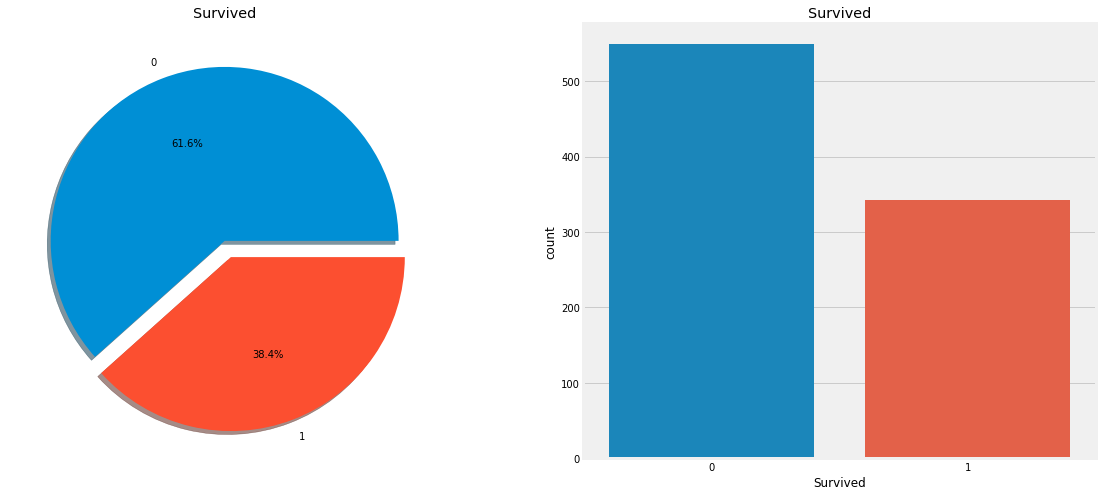

In [ ]:
f, ax =plt.subplots(1,2,figsize=(18,8))

data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')

plt.show()

it is evident that not many passengers survived the accident.

Out of 891 passengers in training set, only around 350 survived i.e only 38.4% of the total training set survived the crash. we need to dig down more to get better insights from the data and see which categories of the passengers did survived and who didn't.

we will try to check the survival rate by sing the different features of the dataset. Some of the feature being sex, part of embarcation, age, etc.

First let us understand the different types of features.



Types of Features

1. categorical feature(nominal variable)
:Sex, Embarked


2. ordinal features
: Pclass


3. continuous feature
:Age


4. ratio variables

nomial variables Sex --> categorical feature

In [ ]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

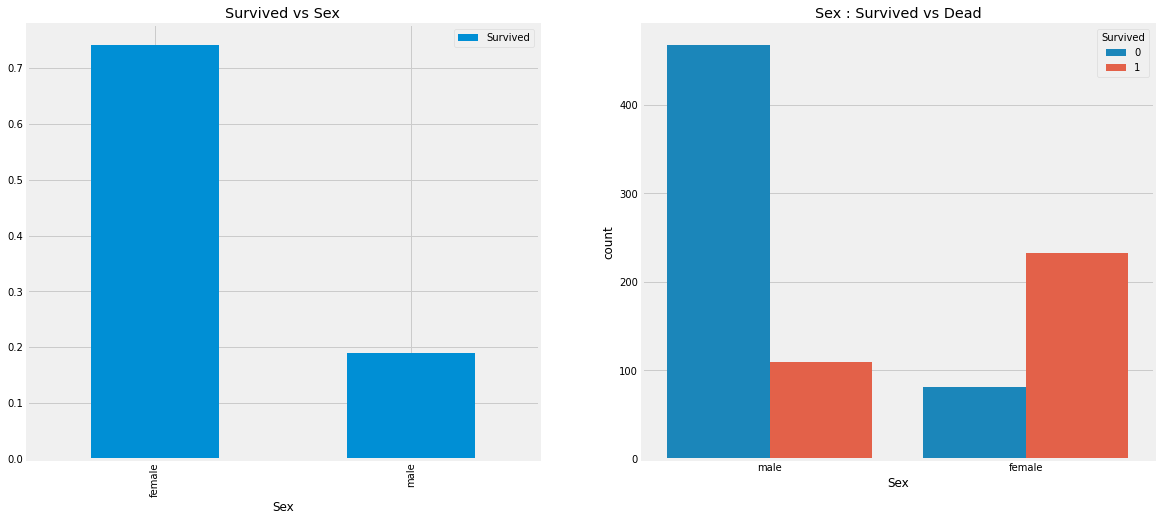

In [ ]:
f, ax = plt.subplots(1,2,figsize=(18,8))

data[ ['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')


sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

Pclass --> ordinal feature

In [ ]:
pd.crosstab(data['Pclass'],data['Survived'],margins=True).style.background_gradient('summer_r')


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


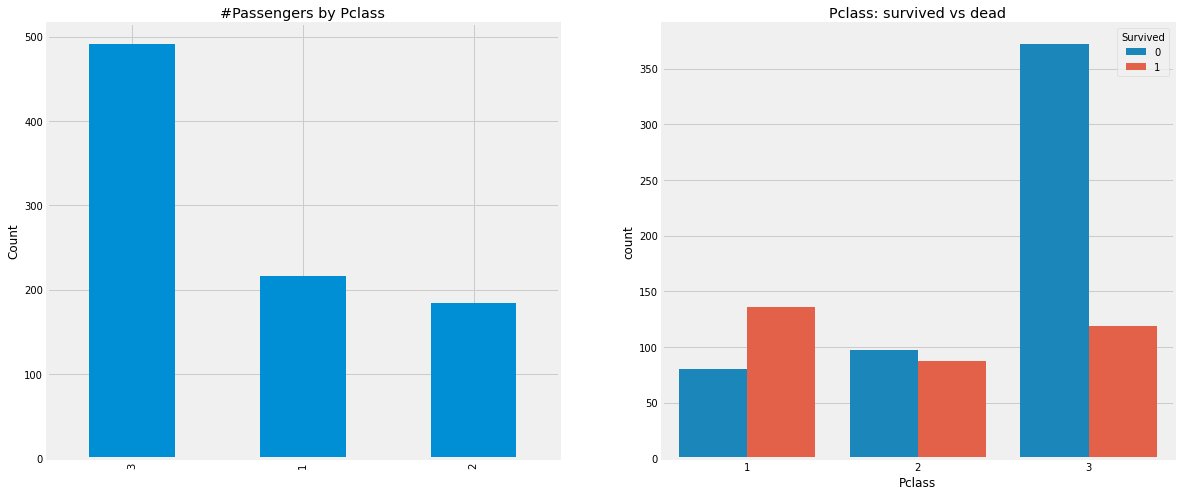

In [ ]:
f, ax = plt.subplots(1,2,figsize=(18,8))

data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('#Passengers by Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass',hue='Survived', data=data,ax=ax[1])
ax[1].set_title('Pclass: survived vs dead')
plt.show()

In [ ]:
pd.crosstab([data['Sex'],data['Survived']], data["Pclass"],margins=True).style.background_gradient('summer_r')

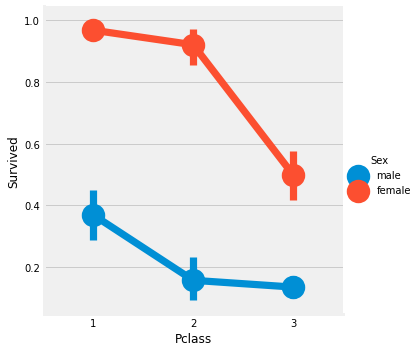

In [ ]:
sns.factorplot('Pclass','Survived',hue='Sex', data=data)
plt.show()

Age --> Continuous Feature

In [ ]:
print('Oldest: {}years.'.format(data['Age'].max()))
print('youngest: {}years.'.format(data['Age'].min()))
print('Average: {:.2f}years.'.format(data['Age'].mean()))

Oldest: 80.0years.
youngest: 0.42years.
Average: 29.70years.


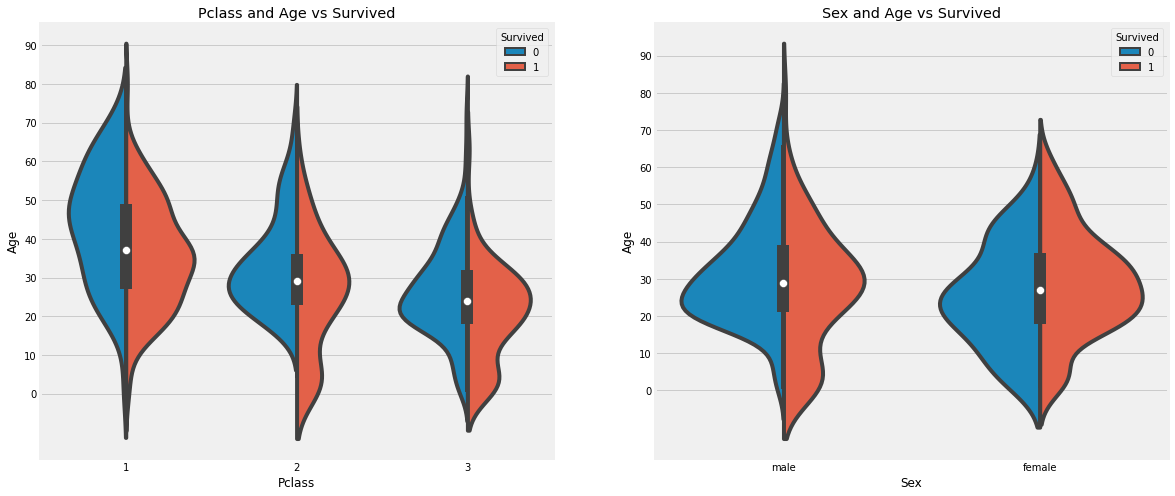

In [ ]:
f, ax = plt.subplots(1,2,figsize=(18,8))

sns.violinplot('Pclass','Age',hue='Survived', data=data, split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,100,10))

sns.violinplot('Sex','Age',hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,100,10))


plt.show()

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data['Name'].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [ ]:
data['Initial']=data['Name'].str.extract(r'([A-Za-z]*)\.')

In [ ]:
data['Initial'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Initial, dtype: int64

In [ ]:
pd.crosstab(data['Initial'],data['Sex'],margins=True).T.style.background_gradient('summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,All
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0,314
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1,577
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


In [ ]:
data['Initial'].replace( ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [ ]:
# data.groupby('Initial')['Age'].mean().plot.bar()

Filling NaN Ages

In [ ]:
data.loc[ (data.Age.isnull()) & (data.Initial == 'Master'), 'Age']=5
data.loc[ (data.Age.isnull()) & (data.Initial == 'Miss'), 'Age']=22
data.loc[ (data.Age.isnull()) & (data.Initial == 'Mr'), 'Age']=33
data.loc[ (data.Age.isnull()) & (data.Initial == 'Mrs'), 'Age']=36
data.loc[ (data.Age.isnull()) & (data.Initial == 'Other'), 'Age']=46

In [ ]:
data.Age.isnull().any()

False

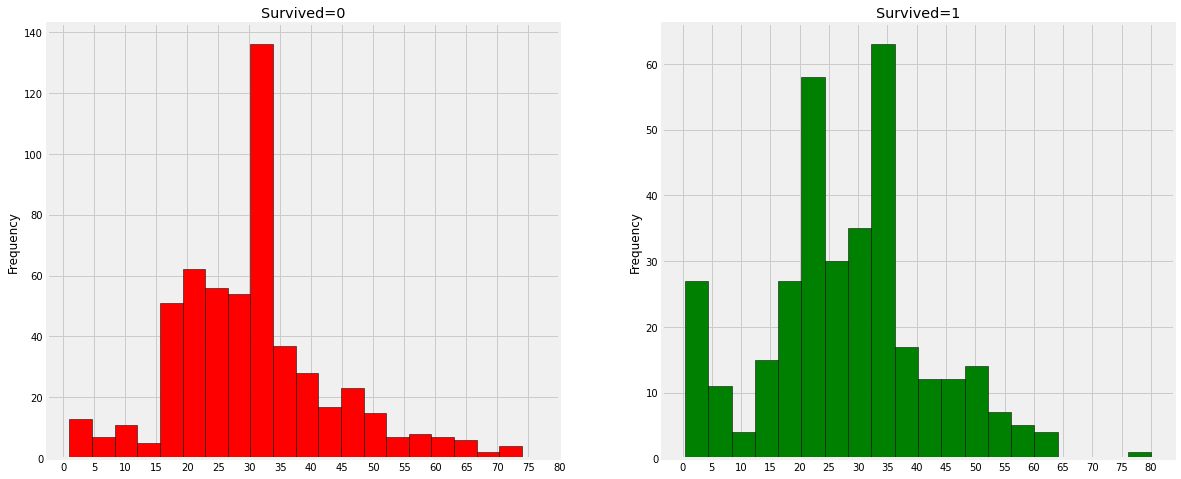

In [ ]:
f, ax =plt.subplots(1,2,figsize=(18,8))

data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20, edgecolor='black',color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
ax[1].set_title('Survived=1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()

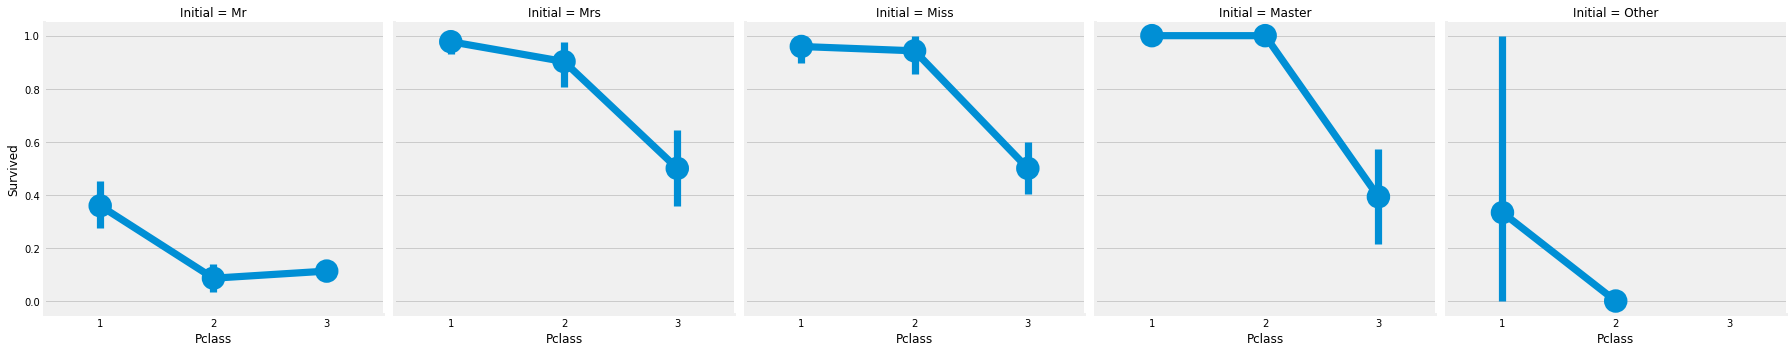

In [ ]:
sns.factorplot('Pclass','Survived', col='Initial', data=data)
plt.show()

Embarked --> categorical Value

In [ ]:
pd.crosstab([data['Embarked'],data['Pclass']],[data['Sex'],data['Survived']],margins=True).T.style.background_gradient('summer_r')

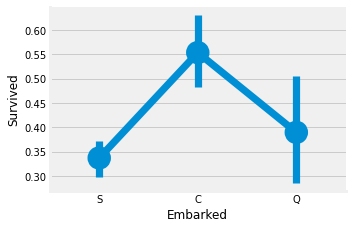

In [ ]:
sns.factorplot('Embarked','Survived', data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

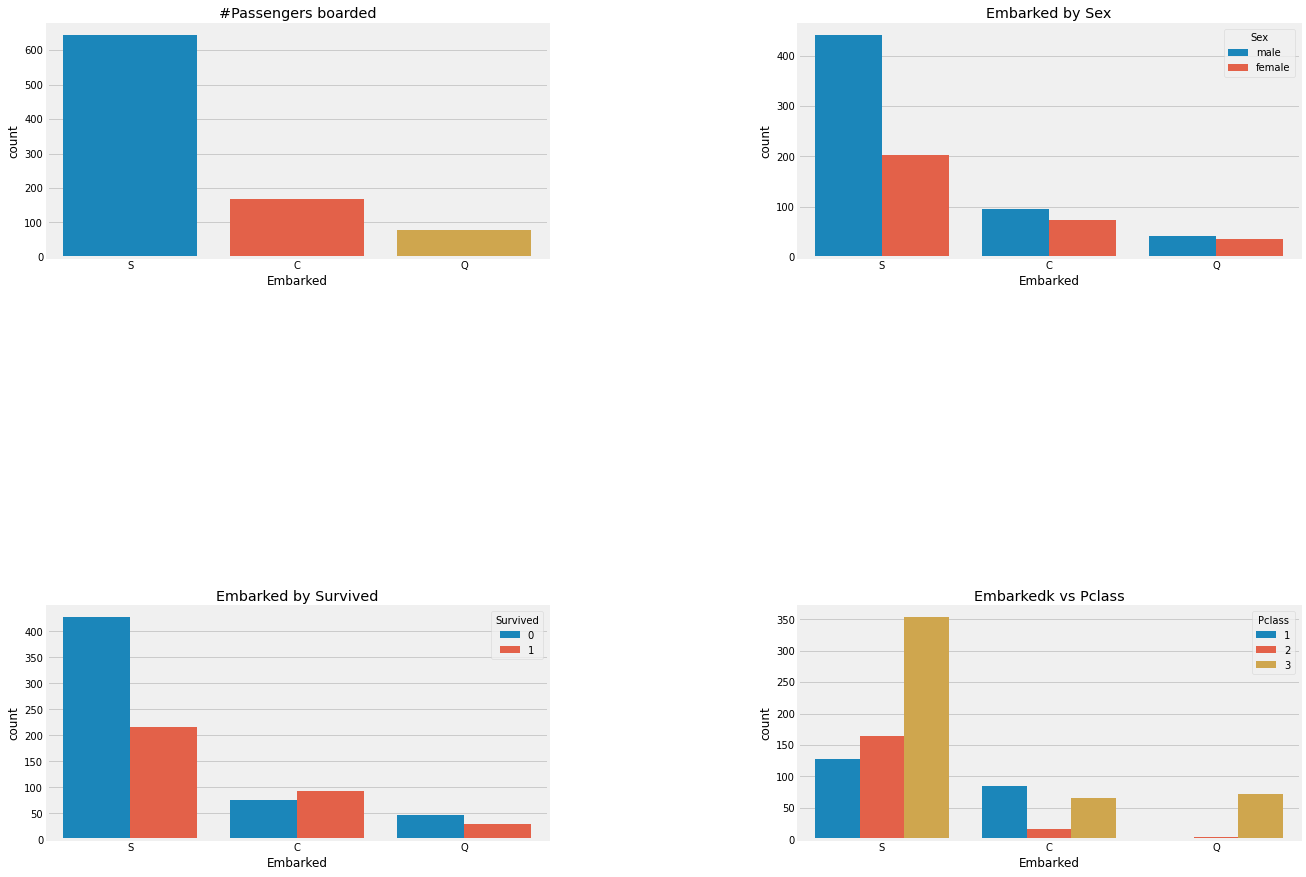

In [ ]:
f, ax =plt.subplots(2,2, figsize=(20,15))

sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('#Passengers boarded')

sns.countplot('Embarked',hue='Sex',data=data, ax=ax[0,1])
ax[0,1].set_title('Embarked by Sex')

sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked by Survived')

sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarkedk vs Pclass')
plt.subplots_adjust(wspace=0.5,hspace=1.5)

plt.show()

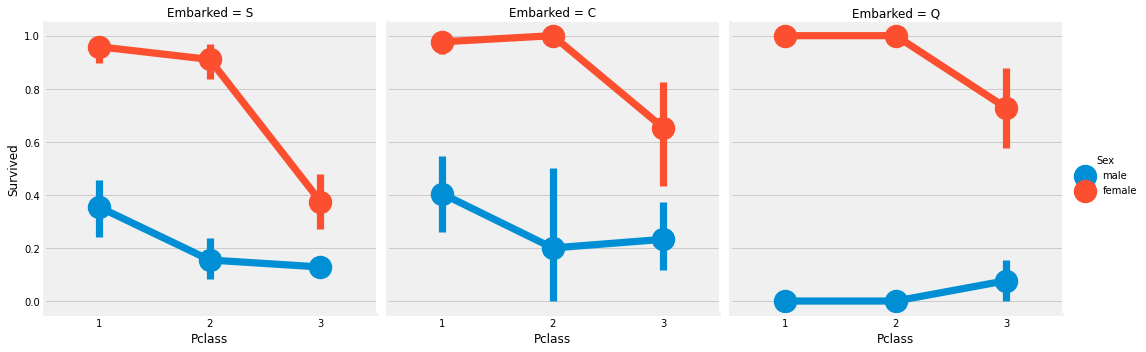

In [ ]:
sns.factorplot('Pclass','Survived',hue='Sex', col='Embarked',data=data)
plt.show()

fillna NaN embarked

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

In [ ]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
data['Embarked'].fillna('S',inplace=True)

In [ ]:
data['Embarked'].isnull().sum()

0

SibSp -> Discrete Feature

In [ ]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient('summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


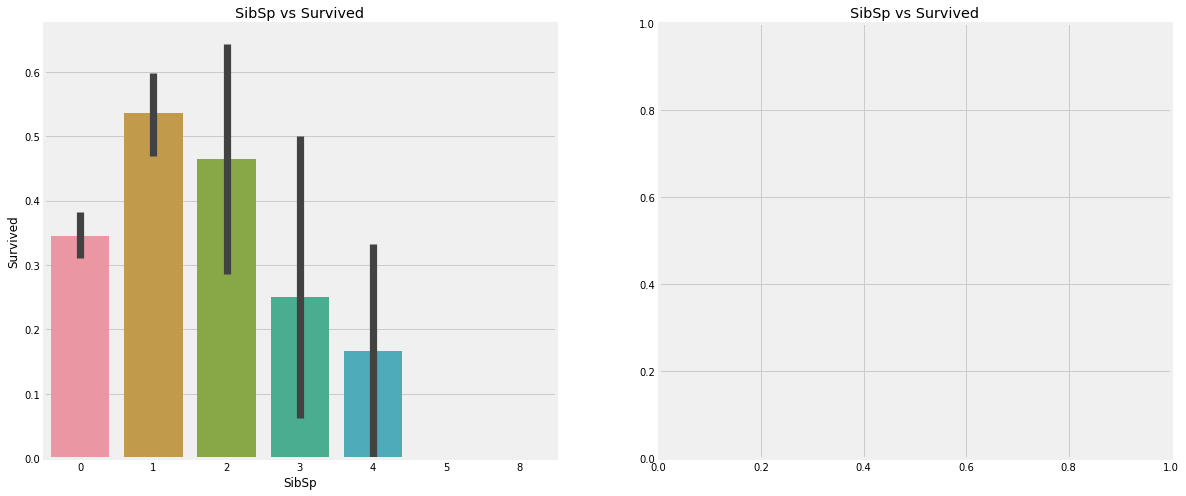

In [ ]:
f, ax = plt.subplots(1,2,figsize=(18,8))

sns.barplot('SibSp','Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()


Parch

In [ ]:
pd.crosstab(data['SibSp'],data['Pclass']).T.style.background_gradient('summer_r')

SibSp,0,1,2,3,4,5,8
Pclass,,,,,,,
1,137,71,5,3,0,0,0
2,120,55,8,1,0,0,0
3,351,83,15,12,18,5,7


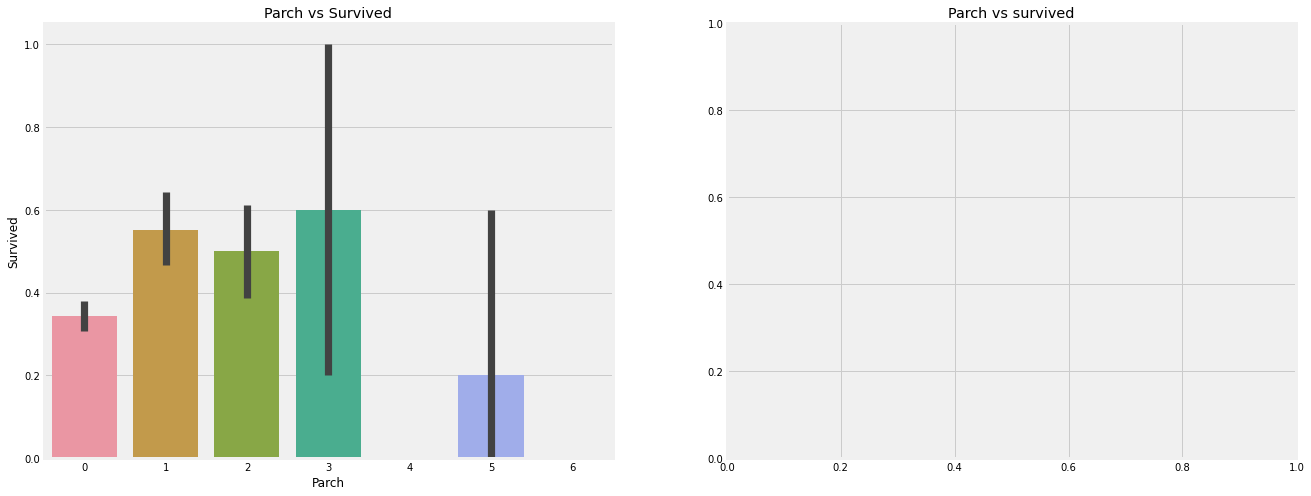

In [ ]:
f, ax = plt.subplots(1,2,figsize=(20,8))

sns.barplot('Parch','Survived',data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs survived')
plt.close(2)
plt.show()

Fare to Continuous Feature

In [ ]:
print('highes fare was :', data['Fare'].max())
print('minimum fare was :', data['Fare'].min())
print('avg fare was :', data['Fare'].mean())

highes fare was : 512.3292
minimum fare was : 0.0
avg fare was : 32.204207968574636


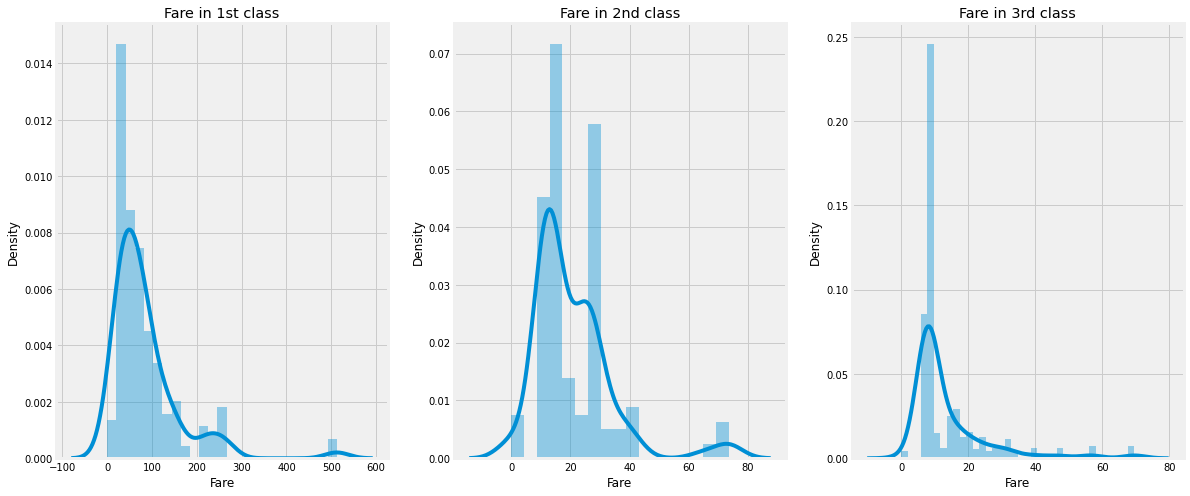

In [ ]:
f,ax=plt.subplots(1,3,figsize=(18,8))

sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fare in 1st class')

sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fare in 2nd class')

sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fare in 3rd class')


plt.show()

correlation btw the features

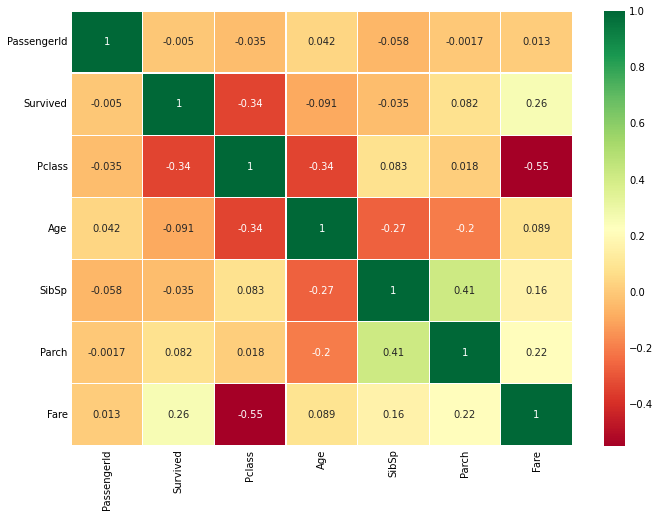

In [ ]:
sns.heatmap(data.corr(),cmap='RdYlGn',annot=True, linewidths=0.2)

fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

##Part2.Feature Engineering and Data Cleaning

purpose of data feature engineering and data cleaning are eliminate the features that won't be important. also, we can get or add more new features by observing or extracting information from other features

#Age_band

continuous values to categorical values

In [ ]:
data['Age'].value_counts()

33.00    135
22.00     63
36.00     39
24.00     30
18.00     26
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 88, dtype: int64

In [ ]:
data['Age_band']=0
data.loc[data['Age'] <=16 , 'Age_band']=0
data.loc[(data['Age'] >16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age'] >32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age'] >48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4

data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [ ]:
data['Age_band'].value_counts()

1    382
2    325
0    104
3     69
4     11
Name: Age_band, dtype: int64

In [ ]:
data['Age_band'].value_counts().to_frame().style.background_gradient('summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


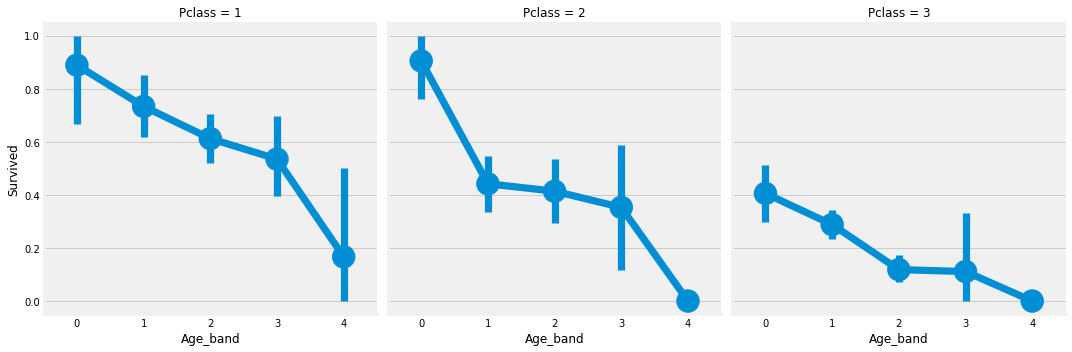

In [ ]:
sns.factorplot('Age_band','Survived',data=data, col='Pclass')

plt.show()

Family_size and Alone

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Initial      891 non-null    object 
 13  Age_band     891 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


In [ ]:
data['Family_Size']=0

data['Family_Size']=data['Parch']+data['SibSp']
data['Alone']=0
data.loc[data.Family_Size==0, 'Alone']=1

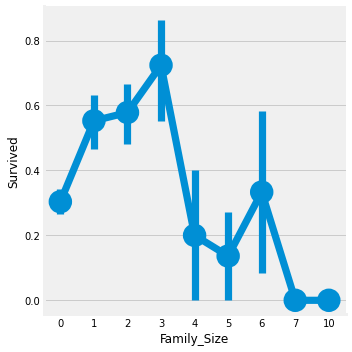

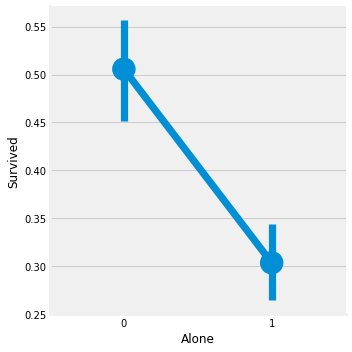

In [ ]:
f, ax = plt.subplots(1,2,figsize=(15,6))

sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone', 'Survived', data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.close(0)
plt.close(1)
plt.show()


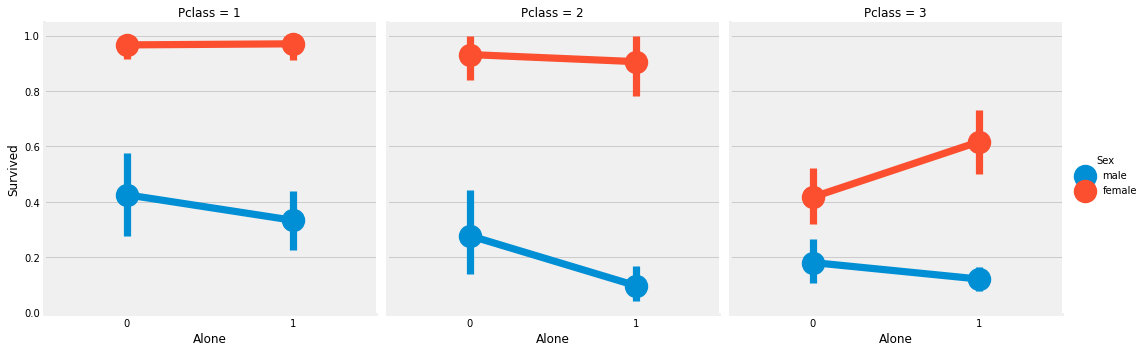

In [ ]:
sns.factorplot('Alone','Survived',col='Pclass',hue='Sex',data=data)
plt.show()

##Fare_Range

since fare is continuous feature, pd.qcut help to convert it into ordinal variable.

In [ ]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data['Fare_Range'].value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: Fare_Range, dtype: int64

In [ ]:
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient('summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


next, we convert this ranged variable to categorical variable

In [ ]:
data['Fare_cat']=0

data.loc[data['Fare'] <=7.91, 'Fare_cat']=0
data.loc[(data['Fare'] >7.91)&(data['Fare'] <=14.454),'Fare_cat']=1
data.loc[(data['Fare'] >14.454)&(data['Fare'] <=31),'Fare_cat']=2
data.loc[(data['Fare'] >31)&(data['Fare'] <=513),'Fare_cat']=3


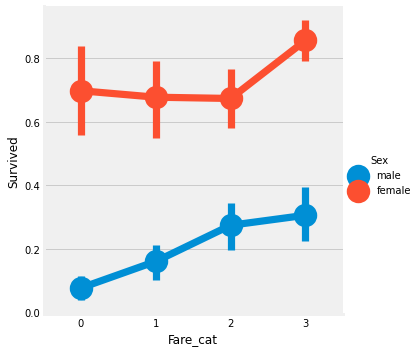

In [ ]:
sns.factorplot('Fare_cat','Survived',hue='Sex',data=data)
plt.show()

##Converting String Values into Numeric

In [ ]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2,0,1,"(7.91, 14.454]",1


In [ ]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Survived     891 non-null    int64
 1   Pclass       891 non-null    int64
 2   Sex          891 non-null    int64
 3   SibSp        891 non-null    int64
 4   Parch        891 non-null    int64
 5   Embarked     891 non-null    int64
 6   Initial      891 non-null    int64
 7   Age_band     891 non-null    int64
 8   Family_Size  891 non-null    int64
 9   Alone        891 non-null    int64
 10  Fare_cat     891 non-null    int64
dtypes: int64(11)
memory usage: 76.7 KB


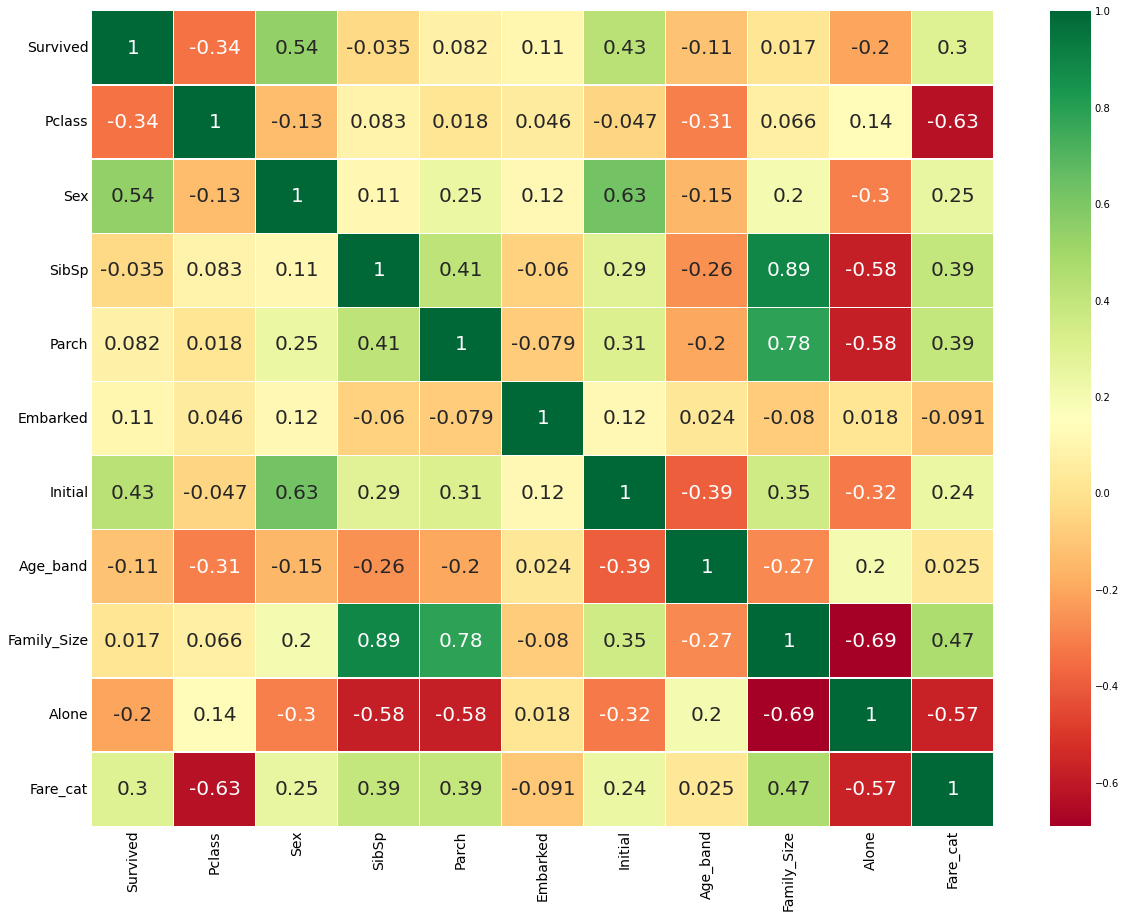

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidth=0.2, annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

##Part3.Predict Modeling

in this notebook, we use these model :

1)Logistic Regression

2)SVM

3)Random Forest

4)KNN

5)Naive Bayes

6)Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix

split train and test sets

In [ ]:
train, test=train_test_split(data, test_size=0.3, random_state=4, stratify=data['Survived'])


In [ ]:
print(train.head(3))
test.head(3)

     Survived  Pclass  Sex  SibSp  Parch  Embarked  Initial  Age_band  \
381         1       3    1      0      2         1        2         0   
474         0       3    1      0      0         0        2         1   
258         1       1    1      0      0         1        2         2   

     Family_Size  Alone  Fare_cat  
381            2      0         2  
474            0      1         1  
258            0      1         3  


,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
688,0,3,0,0,0,0,0,1,0,1,0
313,0,3,0,0,0,0,0,1,0,1,0
764,0,3,0,0,0,0,0,0,0,1,0


In [ ]:
train_x=train[train.columns[1:]]
train_y=train[train.columns[:1]]

test_x=train[test.columns[1:]]
test_y=train[test.columns[:1]]

X=data[data.columns[1:]]
Y=data['Survived']

In [ ]:
X.head()
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Radial Support Vector Machines(rbf-SVM)

In [ ]:
model=svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_x,train_y)
prediction1=model.predict(test_x)
print('Accaracyfor rbfSVM is :', metrics.accuracy_score(prediction1,test_y))

Accaracyfor rbfSVM is : 0.8298555377207063


LinearSVM

In [ ]:
model=svm.SVC(kernel='linear',C=0.1, gamma=0.1)
model.fit(train_x,train_y)
prediction2=model.predict(test_x)
print('Accuracy for linear SVM is:',metrics.accuracy_score(prediction2, test_y))

Accuracy for linear SVM is: 0.8041733547351525


Logistic Regression

In [ ]:
model=LogisticRegression()
model.fit(train_x,train_y)
prediction3=model.predict(test_x)
print('The Accuracy of the LogisticRegression is : ',metrics.accuracy_score(prediction3,test_y))

The Accuracy of the LogisticRegression is :  0.8138041733547352


Decision Tree

In [ ]:
model=DecisionTreeClassifier()
model.fit(train_x,train_y)
prediction4=model.predict(test_x)
print('The Accuracy of the DT is : ',metrics.accuracy_score(prediction4,test_y))

The Accuracy of the DT is :  0.9069020866773676


K-Nearest Neighbors(KNN)

In [ ]:
model=KNeighborsClassifier()
model.fit(train_x,train_y)
prediction5=model.predict(test_x)
print('The Accuracy of the KNN is : ',metrics.accuracy_score(prediction5,test_y))

The Accuracy of the KNN is :  0.8507223113964687


KNN parameter controlling

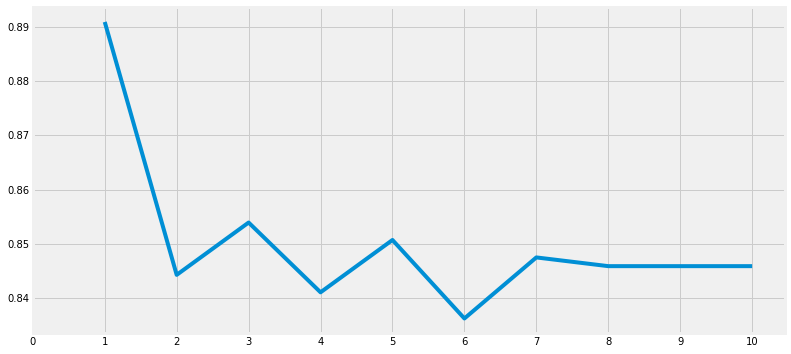

Accuray for different values of n are :  [0.89085072 0.84430177 0.85393258 0.84109149 0.85072231 0.83627608
 0.84751204 0.8459069  0.8459069  0.8459069 ] with the max value is : 0.8908507223113965


In [ ]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)) :
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(train_x,train_y)
  prediction=model.predict(test_x)
  a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))

plt.plot(a_index,a)
plt.xticks(x)

fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

print('Accuray for different values of n are : ',a.values,'with the max value is :',a.values.max())

Gaussian Naive Bayes

In [ ]:
model=GaussianNB()
model.fit(train_x,train_y)
prediction6=model.predict(test_x)
print('The Accaracy of the NB is :',metrics.accuracy_score(prediction6,test_y))

The Accaracy of the NB is : 0.8073836276083467


RandomForests

In [ ]:
model=RandomForestClassifier()
model.fit(train_x,train_y)
prediction7=model.predict(test_x)
print('The Accuracy of the RF is :',metrics.accuracy_score(prediction7,test_y))

The Accuracy of the RF is : 0.9069020866773676


##Cross Validation

many a times, data is imbalanced.
so we should trian adn test our algorithm on each and every instance of the dataset. then we can take an avg of all the noted accuracies over the datasets.

In [ ]:
print(X.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Pclass       891 non-null    int64
 1   Sex          891 non-null    int64
 2   SibSp        891 non-null    int64
 3   Parch        891 non-null    int64
 4   Embarked     891 non-null    int64
 5   Initial      891 non-null    int64
 6   Age_band     891 non-null    int64
 7   Family_Size  891 non-null    int64
 8   Alone        891 non-null    int64
 9   Fare_cat     891 non-null    int64
dtypes: int64(10)
memory usage: 69.7 KB
None


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold=KFold(n_splits=10, random_state=22, shuffle=True)
#not to occur error, we call mean() to xyz
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear SVM','Radial SVM','Logistic Regression','KNN','DecisionTree','Naive Bayes','Random Forest']

models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]

#train이 아닌 실제 data 값에 결과를 집어넣음
for i in models :
  model=i
  cv_result=cross_val_score(model, X,Y, cv=kfold, scoring='accuracy')
  cv_result=cv_result
  xyz.append(cv_result.mean())
  std.append(cv_result.std())
  accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame( {'CV mean':xyz,'Std':std}, index=classifiers)
new_models_dataframe2

,CV mean,Std
Linear SVM,0.784607,0.057841
Radial SVM,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
DecisionTree,0.803608,0.043503
Naive Bayes,0.795843,0.054861
Random Forest,0.811498,0.049450


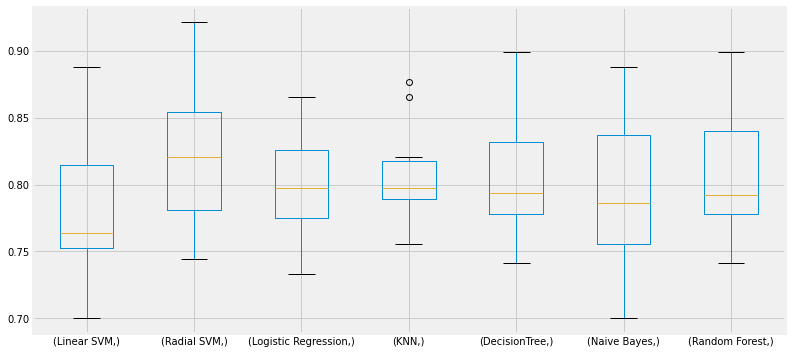

In [ ]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

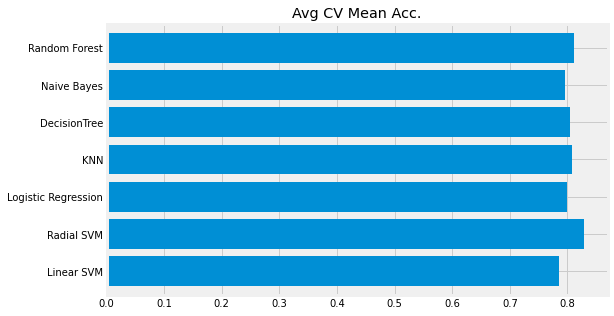

In [ ]:
new_models_dataframe2['CV mean'].plot.barh(width=0.8)
plt.title('Avg CV Mean Acc.')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

the classification accuracy can be sometimes misleading due to imbalance. we can get a summarized resultwith the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.

Confusuion Matrix


it gives the number of correct and incorrect classificaitons made by the classifier

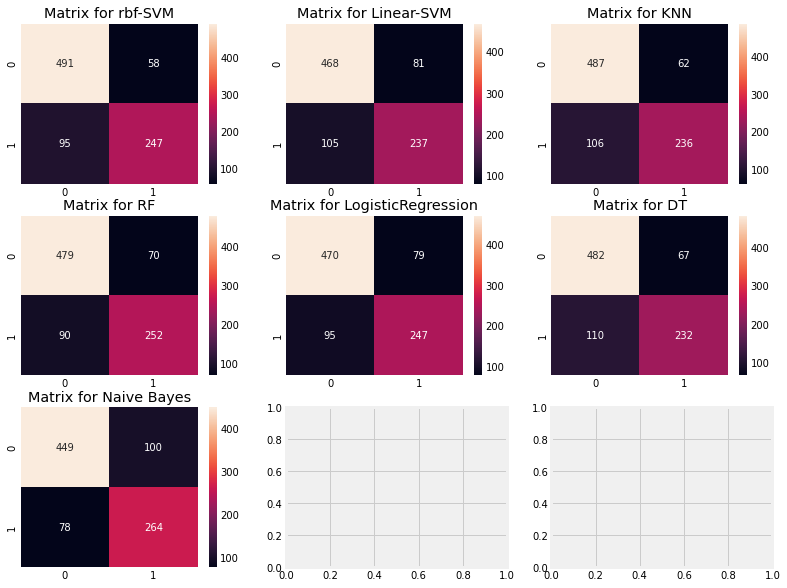

In [ ]:
f,ax = plt.subplots(3,3,figsize=(12,10))

y_pred=cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred=cross_val_predict(svm.SVC(kernel='linear'), X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred=cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred=cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title('Matrix for RF')

y_pred=cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix for LogisticRegression')

y_pred=cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,2], annot=True, fmt='2.0f')
ax[1,2].set_title('Matrix for DT')

y_pred=cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[2,0], annot=True, fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

Interpreting Confusion Matrix

Accuracy :

(491+247)/(491+58+95+247)=83%



precision :

247/(247+100)=71%



recall : 
247/(247+95)=72%


F1 :

2\*ACC\*PRE/(ACC+PRE)


**Why we use F1_score?

: using f1 score rather than accuracy when data is imbalanced. 

##Hyper-Paramaters Tuning

SVM

In [ ]:
from sklearn.model_selection import GridSearchCV

C=[0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel' : kernel, 'C':C, 'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


RandomForests

In [ ]:
n_estimators=range(100,1000,100)
hyper={'n_estimators' :n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=4), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.815956311593748
RandomForestClassifier(n_estimators=900, random_state=4)


###Ensembling

Ensembling can be done in ways like


1)Voting

2)bagging

3)boosting

Voting

voting is simplest way of combining predictions from many different simple machine learning models. It gives an ***average prediction*** result based on the prediction of all the submodels. The submodels or the basemodels are all of different types.

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf=VotingClassifier(estimators=[ ('KNN',KNeighborsClassifier(n_neighbors=10)),
                                             ('RBF',svm.SVC(probability=True, kernel='rbf',C=0.4, gamma=0.3)),
                                             ('RFor',RandomForestClassifier(n_estimators=500,random_state=4)),
                                             ('LR', LogisticRegression(C=0.05)),
                                             ('DT',DecisionTreeClassifier(random_state=4)),
                                             ('NB',GaussianNB()),
                                             ('svm_linear',svm.SVC(kernel='linear', probability=True))

                                             ],
                                 voting='soft').fit(train_x,train_y)

print('The accuracy for ensemble model is :',ensemble_lin_rbf.score(test_x,test_y))
cross=cross_val_score(ensemble_lin_rbf, X,Y,cv=10, scoring='accuracy')
print('The cross validated score is : ',cross.mean())

The accuracy for ensemble model is : 0.8619582664526485
The cross validated score is :  0.8226966292134831


###Bagging

Bagging is a general ensemble method It works by applying similar classifiers on small partitions of the dataset and then *taking the average* of all the predictions.
Due to he avg, there is reducion in variance. Unlike Voting Classifier, Bagging makes **use of similar classifiers**

bagged KNN

Bagging wors best with models with high variance such as DT and RF.

We can use KNN with small value of n_neighbors, as amll value of n_neighbors.

In [ ]:
from sklearn.ensemble import BaggingClassifier

model=BaggingClassifier( base_estimator=KNeighborsClassifier( n_neighbors=5), random_state=4, n_estimators=700)
model.fit(train_x,train_y)
prediction=model.predict(test_x)
print('The accuracy for Bagging KNN is :', metrics.accuracy_score(prediction, test_y))

result=cross_val_score(model, X,Y,cv=10, scoring='accuracy')
print('The cross validated score for Bagging KNN is : ', result.mean())

The accuracy for Bagging KNN is : 0.8587479935794543
The cross validated score for Bagging KNN is :  0.8081897627965045


Bagged DecisionTree

In [ ]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=4, n_estimators=100)
model.fit(train_x,train_y)
prediction=model.predict(test_x)
print('The accuracy for bagged Decision Tree is :',metrics.accuracy_score(prediction, test_y))

result=cross_val_score(model, X,Y,cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is : ',result.mean())

The accuracy for bagged Decision Tree is : 0.9069020866773676
The cross validated score for bagged Decision Tree is :  0.8126466916354556


###Boosting

Boosting is an ensembling technique which uses ***sequential learning*** of classifiers.

It is a *step by step enhancement* of a weak model.

Boosting works as follows:

A model is first *trained on the complete dataset*. Now the model will get some instances right while some wrong. Now in the next interation, the learner will ***focus more on the wrongly predicted instances or give more weight to it***. Thus it will try to preict the wrong instance correctly. Now this iterative process continuous, and new classifers are added to the model until the limit is reached on the accuracy.

####AdaBoost(Adaptive Boosting)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier(n_estimators=200, random_state=4, learning_rate=0.1)

result=cross_val_score(ada,X,Y,cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is : ',result.mean())

The cross validated score for AdaBoost is :  0.8249188514357055


####Stochastic Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grad=GradientBoostingClassifier(n_estimators=500, random_state=4, learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is : ', result.mean())

The cross validated score for Gradient Boosting is :  0.8115230961298376


####XGBoost

In [ ]:
import xgboost as xg

xgboost=xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10, scoring='accuracy')
print('The cross validated score for xgboost is: ',result.mean())

The cross validated score for xgboost is:  0.8115480649188515


#####Hyper_Parameter Tuning for Adaboost

In [ ]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators, 'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper, verbose=True)

gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

##엄청 오래걸리네
##결국 시간이 오래걸리는데에는 learning_rate가 엄청큰 요소로 작용하는듯

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


Confusino Matrix for the Best Model

In [ ]:
ada=AdaBoostClassifier(n_estimators=200, random_state=4, leaning_rate=0.05)
result=cross_val_score(ada,X,Y,cv=10)

sns.heatmap(confusion_matrix(Y,result),cmap='winter', annot=True, fmt='2.0f')
plt.show()

Feature Importance

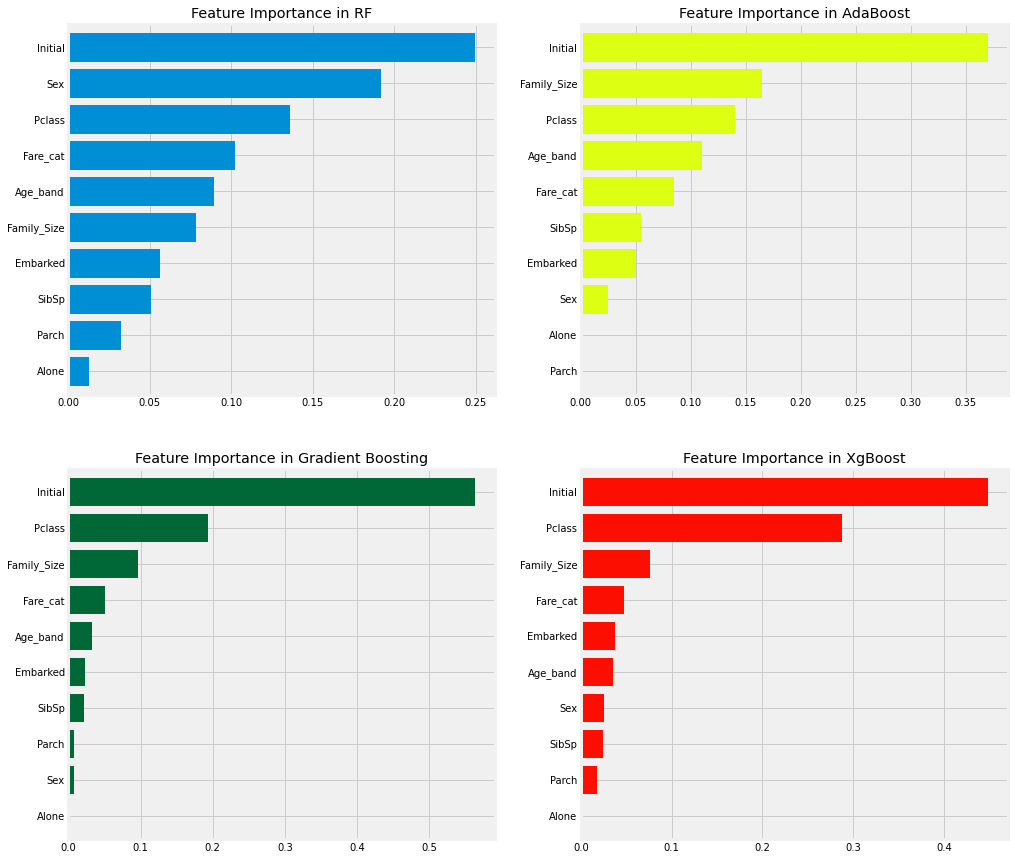

In [ ]:
f, ax =plt.subplots(2,2,figsize=(15,15))

model=RandomForestClassifier(n_estimators=500, random_state=4)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in RF')

model=AdaBoostClassifier(n_estimators=200, learning_rate=0.1, random_state=4)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')


model=GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=4)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model=xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()
